In [3]:
import pandas as pd
import seaborn as sns

import re

import nltk
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.phrases import Phrases, Phraser

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_lg

import string

import pyLDAvis
import pyLDAvis.gensim

from pprint import pprint
from os import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

%matplotlib inline

In [2]:
big_stack = pd.read_csv("data/clean_stackoverflow_big.csv")

In [3]:
big_stack.head()

,question,summary,tags,user_id,no_of_votes,no_of_answers,date
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02
1,How to implement like button concept in viewpa...,I have a viewpager which displays images and b...,"['android', 'android-viewpager']",Marat Zangiev,1.0,1.0,2019-08-02
2,Is it a good practice using Observable with as...,I am using angular 2 common http that return a...,"['javascript', 'angular', 'typescript', 'promi...",Ashwin J Chhetri,48.0,2.0,2019-08-02
3,UBSan: Store to misaligned address; what is th...,"I've been running some code under UBSan, and f...",['ubsan'],Flamefire,0.0,1.0,2019-08-02
4,Django-Filter Form Displaying All Filters?,I've just started working with Django Filter. ...,"['django-filter', 'django-filters']",udeep shrestha,0.0,2.0,2019-08-02


,question,summary,tags,user_id,no_of_votes,no_of_answers,date
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02
1,How to implement like button concept in viewpa...,I have a viewpager which displays images and b...,"['android', 'android-viewpager']",Marat Zangiev,1.0,1.0,2019-08-02
2,Is it a good practice using Observable with as...,I am using angular 2 common http that return a...,"['javascript', 'angular', 'typescript', 'promi...",Ashwin J Chhetri,48.0,2.0,2019-08-02
3,UBSan: Store to misaligned address; what is th...,"I've been running some code under UBSan, and f...",['ubsan'],Flamefire,0.0,1.0,2019-08-02
4,Django-Filter Form Displaying All Filters?,I've just started working with Django Filter. ...,"['django-filter', 'django-filters']",udeep shrestha,0.0,2.0,2019-08-02


In [4]:
big_stack.shape

(16955385, 7)

(16955385, 7)

In [ ]:
%%time

stop_words = stopwords.words('english')
nlp = en_core_web_lg.load(disable=['parser', 'ner'])

# clean the text using below for loop
clean_text = []
for index in range(len(big_stack)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', big_stack['question'][index])

    #Convert to lowercase
    text = text.lower()
    
    #remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Convert to list of words from text
    text = text.split()
    
    # remove stop words after splitting text and joint the words
    text =[word for word in text if word not in stop_words]
    text = " ".join(text)
    # lemmatize words using spacy
    
    doc = nlp(text)
    text=" ".join([token.lemma_ for token in doc])

   # append to clean_text
    clean_text.append(text)
    
big_stack['clean_text'] = clean_text

In [ ]:
#import nltk
#nltk.download()

In [ ]:
big_stack.head()

In [ ]:
big_stack.to_csv('clean_big_questions_052320.csv', index=False)

In [ ]:
#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("data/wordcloud_questions_big.png")
plt.show()

In [4]:
big_stack = pd.read_csv('clean_big_questions_052320.csv')

In [66]:
big_stack.head(35)

,question,summary,tags,user_id,no_of_votes,no_of_answers,date,clean_text
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02,multiple json object list
1,How to implement like button concept in viewpa...,I have a viewpager which displays images and b...,"['android', 'android-viewpager']",Marat Zangiev,1.0,1.0,2019-08-02,implement like button concept viewpager
2,Is it a good practice using Observable with as...,I am using angular 2 common http that return a...,"['javascript', 'angular', 'typescript', 'promi...",Ashwin J Chhetri,48.0,2.0,2019-08-02,good practice use observable async await
3,UBSan: Store to misaligned address; what is th...,"I've been running some code under UBSan, and f...",['ubsan'],Flamefire,0.0,1.0,2019-08-02,ubsan store misalign address problem care
4,Django-Filter Form Displaying All Filters?,I've just started working with Django Filter. ...,"['django-filter', 'django-filters']",udeep shrestha,0.0,2.0,2019-08-02,django filter form display filter
5,Run a script from inside a shell script,I have been trying to run a shell script from ...,"['shell', 'sh']",Armali,-1.0,2.0,2019-08-02,run script inside shell script
6,How to show connection line in d3.js map ('Err...,"""I'm making a world map with a orange connecti...","['javascript', 'd3.js']",Jack,1.0,0.0,2019-08-02,show connection line js map error path attribu...
7,How do I upload a R dataframe as a CSV file on...,I'm trying to convert a dataframe in R to a CS...,"['r', 'azure', 'azure-storage-blobs']",Peter Pan,2.0,1.0,2019-08-02,upload r dataframe csv file azure blob storage
8,How can I set the version of a NuGet nuspec <d...,I have a Windows batch file that builds severa...,"['nuget', 'nuspec']",Dai,0.0,0.0,2019-08-02,set version nuget nuspec dependency command line
9,adding a custom header to ray wenderlich Pinte...,I used the Pinterest layout file provided from...,"['ios', 'swift', 'swift4']",Bùi Minh Đức,2.0,1.0,2019-08-02,add custom header ray wenderlich pinterest layout


In [8]:
big_stack['tags'].str.contains(pat = 'python').sum()

1464969

In [10]:
big_stack['tags'].str.contains(pat = 'excel').sum()

221913

In [71]:
r_stack = big_stack['tags'].str.contains(pat = "(\'r'{1})")

In [44]:
python_stack = big_stack[big_stack['tags'].str.contains(pat = 'python')]

In [45]:
python_stack.head()

,question,summary,tags,user_id,no_of_votes,no_of_answers,date,clean_text
0,multiple json objects into a list,"{""Id"": 1,""product"": ""Mobile"",""price"": 32889,""d...","['python', 'json']",diveinsky,0.0,1.0,2019-08-02,multiple json object list
13,cannot read in image in colour in opencv python,I have just started to use Opencv using python...,"['python-2.7', 'opencv']",Yogesh,0.0,2.0,2019-08-02,can not read image colour opencv python
16,How to resolve related foreign key at insert t...,Motivations\n\nI have data coming from a sourc...,"['python', 'pandas', 'orm', 'sqlalchemy', 'for...",jlandercy,4.0,2.0,2019-08-02,resolve relate foreign key insert time use sql...
23,syntax error in python shorthand expression,I am using bs4 to scrape a website I have thi...,"['python', 'python-3.x', 'beautifulsoup']",QHarr,2.0,2.0,2019-08-02,syntax error python shorthand expression
35,When do we need to pip install future [duplicate],As per the documentation the module future pro...,"['python', 'future']",Jay Joshi,0.0,0.0,2019-08-02,need pip install future duplicate


In [72]:
r_stack.to_csv('clean_r_stack_052620.csv', index=False)

In [31]:
#analysis_2019 = big_stack[(big_stack['date'] >= '2019-01-01') &  (big_stack['date'] <= '2019-12-31')]
analysis_2019.shape
#analysis_2019.to_csv('rdata/data_2019.csv')

(2517347, 8)

In [32]:
#analysis_2018 = big_stack[(big_stack['date'] >= '2018-01-01') &  (big_stack['date'] <= '2018-12-31')]
analysis_2018.shape
#analysis_2018.to_csv('rdata/data_2018.csv')

(2140153, 8)

In [33]:
#analysis_2017 = big_stack[(big_stack['date'] >= '2017-01-01') &  (big_stack['date'] <= '2017-12-31')]
analysis_2017.shape
#analysis_2017.to_csv('rdata/data_2017.csv')

(2002870, 8)

In [34]:
#analysis_2016 = big_stack[(big_stack['date'] >= '2016-01-01') &  (big_stack['date'] <= '2016-12-31')]
analysis_2016.shape
#analysis_2016.to_csv('rdata/data_2016.csv')

(2120266, 8)

In [35]:
#analysis_2015 = big_stack[(big_stack['date'] >= '2015-01-01') &  (big_stack['date'] <= '2015-12-31')]
analysis_2015.shape
#analysis_2015.to_csv('rdata/data_2015.csv')

(2230821, 8)

In [36]:
#analysis_2014 = big_stack[(big_stack['date'] >= '2014-01-01') &  (big_stack['date'] <= '2014-12-31')]
print(analysis_2014.shape)
#analysis_2014.to_csv('rdata/data_2014.csv')

(2057709, 8)


In [37]:
#analysis_2020 = big_stack[(big_stack['date'] >= '2020-01-01') &  (big_stack['date'] <= '2020-12-31')]
analysis_2020.shape
#analysis_2020.to_csv('rdata/data_2020.csv')

(1251931, 8)

In [38]:
#analysis_pre = big_stack[big_stack['date'] <= '2013-12-31']
analysis_pre.shape

(2633052, 8)

In [46]:
python_stack['clean_text'].isna().sum()

12

In [47]:
python_stack = python_stack.dropna(subset=['clean_text'])

In [48]:
python_stack['clean_text'] = python_stack['clean_text'].str.split(' ')

In [49]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [50]:
nlp = en_core_web_lg.load(disable=['parser', 'ner'])

In [51]:
lemmatized_words = lemmatization(python_stack['clean_text'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [53]:
stop_words = stopwords.words('english')

                           Bigram        Freq
0                 file use python  935.816638
1                text file python  570.278383
2             use selenium python  473.792452
3               create new column  469.526746
4     require positional argument  462.241284
5        unsupported operand type  418.474398
6                  key value pair  384.182261
7     unexpected keyword argument  371.695760
8                list index range  366.813049
9                  list list list  346.964790
10         use regular expression  345.017619
11            invalid literal int  341.119486
12             visual studio code  340.256187
13              run python script  331.602606
14                 read text file  325.224838
15                 line text file  323.696781
16               literal int base  322.538143
17           convert string float  318.695478
18      regular expression python  316.076879
19              many value unpack  301.079204
20             index must integer 

[Text(0, 0, 'file use python'),
 Text(0, 0, 'text file python'),
 Text(0, 0, 'use selenium python'),
 Text(0, 0, 'create new column'),
 Text(0, 0, 'require positional argument'),
 Text(0, 0, 'unsupported operand type'),
 Text(0, 0, 'key value pair'),
 Text(0, 0, 'unexpected keyword argument'),
 Text(0, 0, 'list index range'),
 Text(0, 0, 'list list list'),
 Text(0, 0, 'use regular expression'),
 Text(0, 0, 'invalid literal int'),
 Text(0, 0, 'visual studio code'),
 Text(0, 0, 'run python script'),
 Text(0, 0, 'read text file'),
 Text(0, 0, 'line text file'),
 Text(0, 0, 'literal int base'),
 Text(0, 0, 'convert string float'),
 Text(0, 0, 'regular expression python'),
 Text(0, 0, 'many value unpack'),
 Text(0, 0, 'index must integer'),
 Text(0, 0, 'error object attribute'),
 Text(0, 0, 'use beautiful soup'),
 Text(0, 0, 'text file use'),
 Text(0, 0, 'element list list'),
 Text(0, 0, 'object attribute get'),
 Text(0, 0, 'list object attribute'),
 Text(0, 0, 'add new column'),
 Text(0, 0

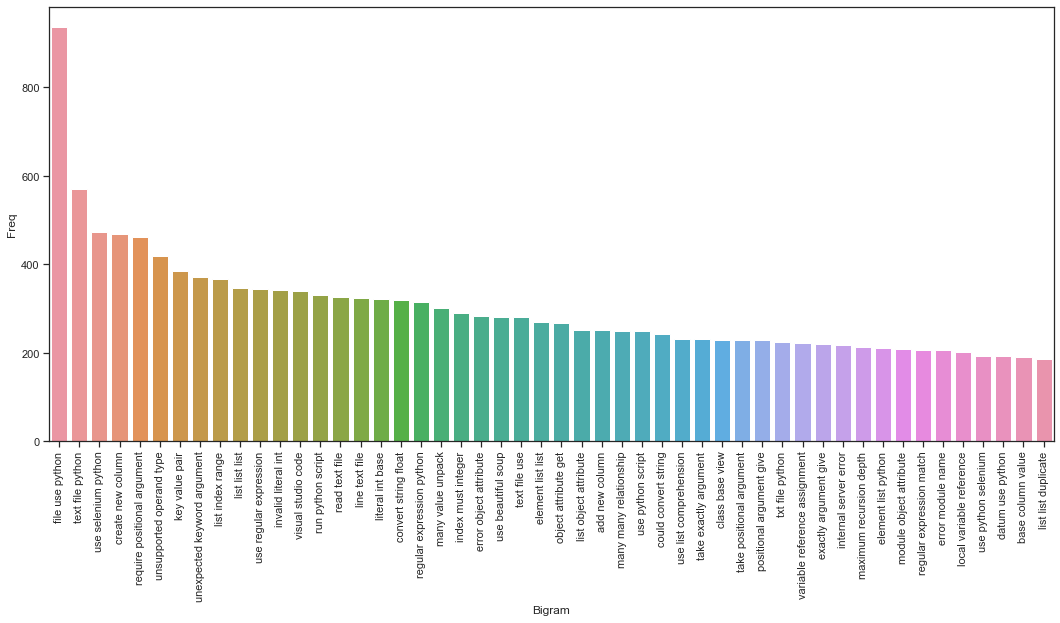

In [73]:
%%time

def top_bi_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in lemmatized_words]
    vectorizer = TfidfVectorizer(ngram_range = (3,3), min_df = 2,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(python_stack['clean_text'], n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);